<img src='./1.png'>

# imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import warnings; warnings.filterwarnings(action='ignore')

import matplotlib as mpl
# import statsmodels.api as sm
# import scipy.stats as stats
# import statsmodels.api as sm

from IPython.core.display import display, HTML
# display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

plt.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
from sklearn import datasets

# preprocessing.encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder # pd.get_dummies
# preprocessing.scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler


# decomposition.PCA
from sklearn.decomposition import PCA

# estimators.regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
# --------------------------------------------------

# neural network -----------------------------------
import tensorflow as tf
import keras
# --------------------------------------------------

# ensemble -----------------------------------------
# ensemble.bagging
from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
# ensemble.boosting
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
# ensemble.boosting & bagging
from xgboost import XGBRFClassifier, XGBRFRegressor
# ensemble.voting
from sklearn.ensemble import VotingClassifier, VotingRegressor
# --------------------------------------------------

# metrics ------------------------------------------

# metrics.errors
from sklearn.metrics import mean_squared_error     # 'neg_mean_squared_error', 'neg_root_mean_squared_error'
from sklearn.metrics import mean_squared_log_error # 'neg_mean_squared_log_error'
from sklearn.metrics import mean_absolute_error    # 'neg_mean_absolute_error'

# model_selection ----------------------------------
# model_selection.splitter
from sklearn.model_selection import train_test_split
# model_selection.model_validation
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_validate
# model_selection.hyper_parameter_optimizer
from sklearn.model_selection import GridSearchCV
# --------------------------------------------------

# read

In [3]:
train = pd.read_csv("FIFA_train.csv")
test = pd.read_csv("FIFA_test.csv")
sub = pd.read_csv("submission.csv")

In [4]:
print(train.shape, test.shape)

(8932, 12) (3828, 11)


In [5]:
train.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8932 non-null   int64  
 1   name              8932 non-null   object 
 2   age               8932 non-null   int64  
 3   continent         8932 non-null   object 
 4   contract_until    8932 non-null   object 
 5   position          8932 non-null   object 
 6   prefer_foot       8932 non-null   object 
 7   reputation        8932 non-null   float64
 8   stat_overall      8932 non-null   int64  
 9   stat_potential    8932 non-null   int64  
 10  stat_skill_moves  8932 non-null   float64
 11  value             8932 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 837.5+ KB


In [7]:
train.isna().sum()

id                  0
name                0
age                 0
continent           0
contract_until      0
position            0
prefer_foot         0
reputation          0
stat_overall        0
stat_potential      0
stat_skill_moves    0
value               0
dtype: int64

In [8]:
test.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
0,1,Cristiano Ronaldo,33,europe,2022,ST,right,5.0,94,94,5.0
1,2,Neymar Jr,26,south america,2022,ST,right,5.0,92,93,5.0
2,4,K. De Bruyne,27,europe,2023,MF,right,4.0,91,92,4.0
3,5,E. Hazard,27,europe,2020,ST,right,4.0,91,91,4.0
4,6,L. Modrić,32,europe,2020,MF,right,4.0,91,91,4.0


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3828 entries, 0 to 3827
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                3828 non-null   int64  
 1   name              3828 non-null   object 
 2   age               3828 non-null   int64  
 3   continent         3828 non-null   object 
 4   contract_until    3828 non-null   object 
 5   position          3828 non-null   object 
 6   prefer_foot       3828 non-null   object 
 7   reputation        3828 non-null   float64
 8   stat_overall      3828 non-null   int64  
 9   stat_potential    3828 non-null   int64  
 10  stat_skill_moves  3828 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 329.1+ KB


In [10]:
train["continent"].value_counts()

europe           5322
south america    1927
asia              787
africa            721
oceania           175
Name: continent, dtype: int64

In [11]:
train["position"].value_counts()

MF    3428
DF    2791
ST    1705
GK    1008
Name: position, dtype: int64

In [12]:
train["prefer_foot"].value_counts()


right    6837
left     2095
Name: prefer_foot, dtype: int64

In [13]:
train["contract_until"].value_counts()

2019            2366
2021            2308
2020            2041
2022             761
2023             506
Jun 30, 2019     501
2018             327
Dec 31, 2018      64
May 31, 2019      19
2024              12
Jan 31, 2019      10
Jun 30, 2020       9
2025               3
Jan 1, 2019        2
2026               1
May 31, 2020       1
Jan 12, 2019       1
Name: contract_until, dtype: int64

In [14]:
df = pd.concat([train, test])
df.reset_index
df.shape

(12760, 12)

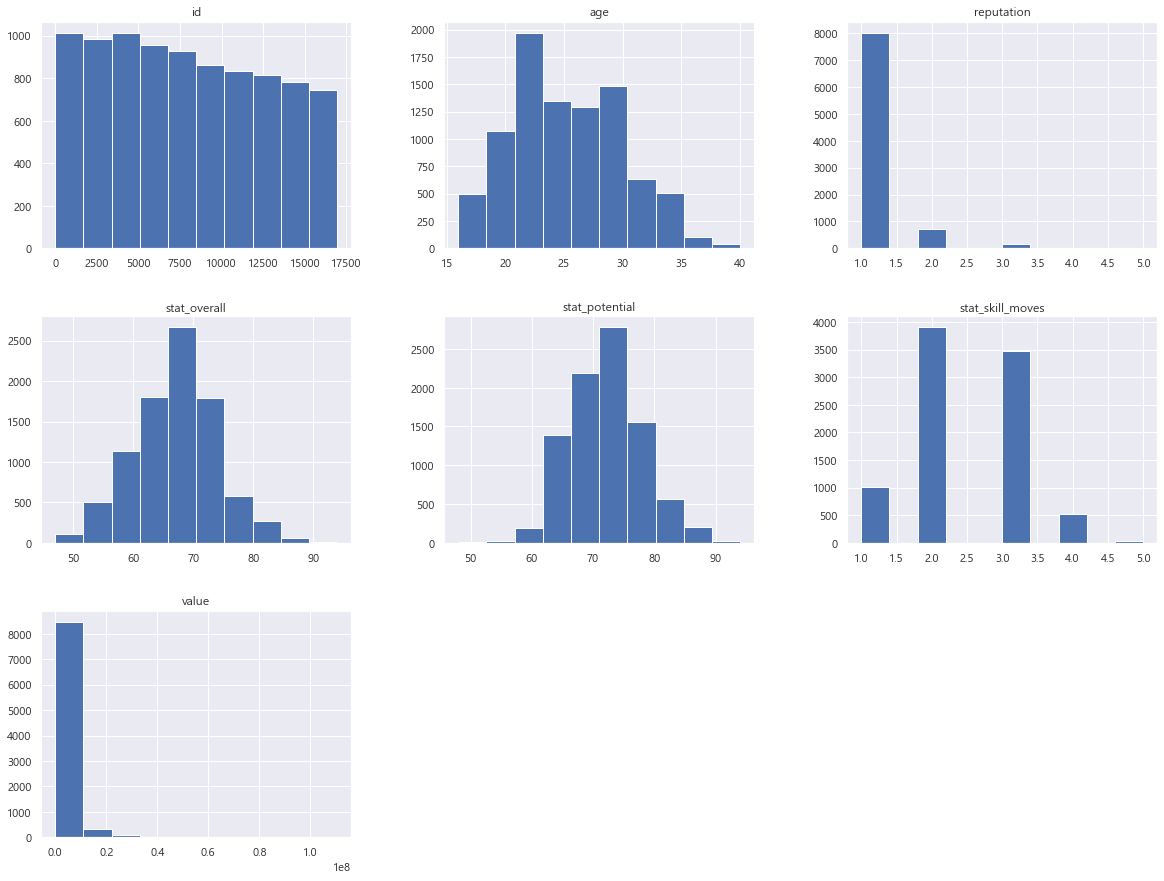

In [15]:
train.hist(figsize=(20,15))
plt.show()

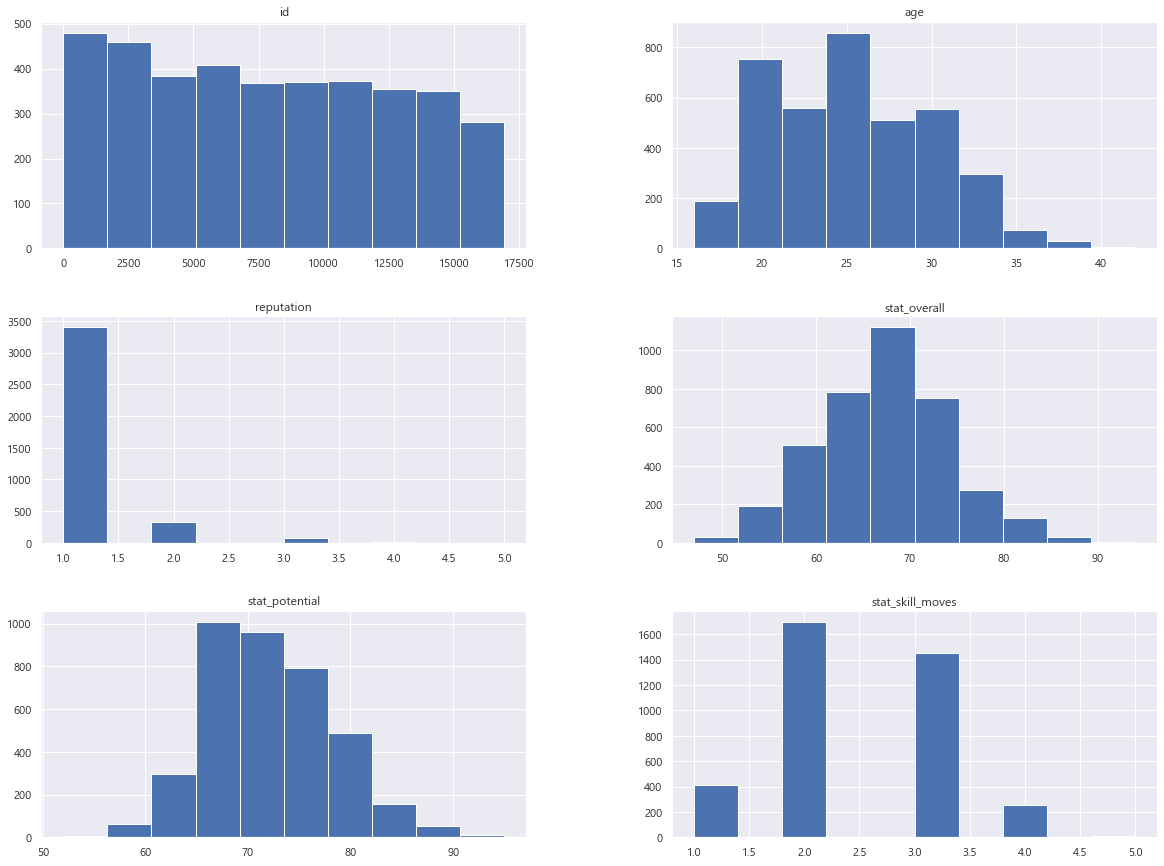

In [16]:
test.hist(figsize=(20,15))
plt.show()

<AxesSubplot:>

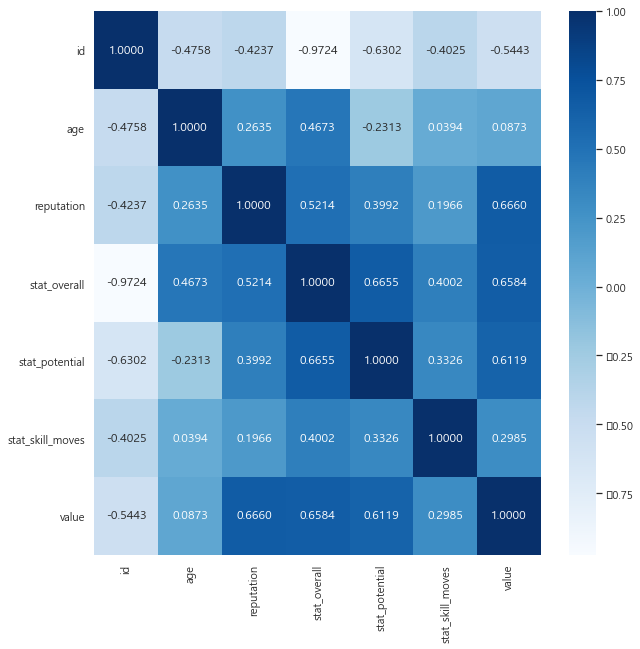

In [17]:
fig, ax = plt.subplots(figsize=(10,10))     
sns.heatmap(train.corr(), annot=True, fmt=".4f", cmap="Blues")

# EDA

In [18]:
df.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0


In [19]:
df[df["stat_overall"] > df["stat_potential"]]

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value


In [20]:
df["성장률"] = df["stat_overall"] /  df["stat_potential"]

In [21]:
df.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value,성장률
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0,1.000000
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0,0.978495
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0,1.000000
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0,1.000000
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0,0.967742


In [22]:
df["contract_until"].unique()

array(['2021', '2020', '2019', '2023', '2022', '2024', 'Jun 30, 2019',
       '2026', 'Dec 31, 2018', '2018', '2025', 'Jun 30, 2020',
       'May 31, 2020', 'May 31, 2019', 'Jan 31, 2019', 'Jan 1, 2019',
       'Jan 12, 2019', 'Dec 31, 2019', 'Jun 1, 2019'], dtype=object)

In [23]:
dict1 = {'2021':2021, '2020':2020, '2019':2019, '2023':2023, '2022':2022, '2024':2024, 'Jun 30, 2019':2019,
       '2026':2026, 'Dec 31, 2018':2018, '2018':2018, '2025':2025, 'Jun 30, 2020':2020,
       'May 31, 2020':2020, 'May 31, 2019':2019, 'Jan 31, 2019':2019, 'Jan 1, 2019':2019,
       'Jan 12, 2019':2019, 'Dec 31, 2019':2019, 'Jun 1, 2019':2019}

In [24]:
df["contract_until"]=df["contract_until"].map(dict1)

In [25]:
df["contract_until"].value_counts()

2019    4070
2021    3293
2020    2938
2022    1099
2023     757
2018     580
2024      14
2025       7
2026       2
Name: contract_until, dtype: int64

In [26]:
df["남은계약년도"] = df["contract_until"] - 2018

In [27]:
df = df.drop(["id", "name"], axis=1)

In [28]:
df.head()

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value,성장률,남은계약년도
0,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0,1.000000,3
1,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0,0.978495,2
2,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0,1.000000,3
3,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0,1.000000,2
4,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0,0.967742,3


In [29]:
df = pd.get_dummies(df)
df.head()

,age,contract_until,reputation,stat_overall,stat_potential,stat_skill_moves,value,성장률,남은계약년도,continent_africa,continent_asia,continent_europe,continent_oceania,continent_south america,position_DF,position_GK,position_MF,position_ST,prefer_foot_left,prefer_foot_right
0,31,2021,5.0,94,94,4.0,110500000.0,1.000000,3,0,0,0,0,1,0,0,0,1,1,0
1,27,2020,4.0,91,93,1.0,72000000.0,0.978495,2,0,0,1,0,0,0,1,0,0,0,1
2,31,2021,5.0,91,91,3.0,80000000.0,1.000000,3,0,0,0,0,1,0,0,0,1,0,1
3,32,2020,4.0,91,91,3.0,51000000.0,1.000000,2,0,0,1,0,0,1,0,0,0,0,1
4,25,2021,3.0,90,93,1.0,68000000.0,0.967742,3,0,0,1,0,0,0,1,0,0,0,1


In [30]:
train = df.iloc[:train.shape[0]]
test = df.iloc[train.shape[0]:]
print(train.shape, test.shape)

(8932, 20) (3828, 20)


In [31]:
scale = MinMaxScaler()
scale.fit(np.array(train["contract_until"]).reshape(-1,1))
train["contract_until"] = scale.transform(np.array(train["contract_until"]).reshape(-1,1))
test["contract_until"] = scale.transform(np.array(test["contract_until"]).reshape(-1,1))

In [32]:
test = test.drop("value", axis=1)


In [33]:
y = train["value"]
X = train.drop("value", axis=1)

In [34]:
log_y = np.log1p(y)

In [35]:
boosting_model = GradientBoostingRegressor(loss='ls', learning_rate=0.1, n_estimators=1000,
                 subsample=1.0, criterion='friedman_mse',  #{'friedman_mse', 'mse', 'mae'}
                          random_state=1414, alpha=0.9)
            
bagging_model = BaggingRegressor(base_estimator=boosting_model,  # None = DecisionTreeRegressor.
                 n_estimators=1000,
                 max_samples=1.0,
                 max_features=1.0,
                 bootstrap=True,
                 oob_score=False,
                 random_state=1414)
bagging_model.fit(X, log_y)
pred = bagging_model.predict(test)

In [36]:
sub["value"] = np.expm1(pred)
sub.head()

,id,value
0,1,6.057778e+07
1,2,1.069276e+08
2,4,8.971635e+07
3,5,9.565083e+07
4,6,6.358776e+07


In [37]:
sub.to_csv("./sub/sub2.csv", index=False)

<img src="./캡처.png">